In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

In [2]:
# Abre o arquivo h5 que contém os dados do pulso
file_wave = h5py.File( "C:/Users/vinif/Desktop/PIBIC/Programas/Atenuador/M1/output-wave_0_M1.h5", 'r' )
d_wave = file_wave[ 'Waveform' ]
d_wave_meta = file_wave[ 'Metadata' ]

# Mostra o número de enventos do pulso
print ( "Number of events (wave): {:d}".format( d_wave.shape[0] ) )

Number of events (wave): 10000


In [3]:
# Data Frame do pandas para o pulso
pd.options.mode.chained_assignment = None
df_wave = pd.DataFrame( columns=('Event','Channel','Waveform') )
df_wave['Event']   = d_wave_meta[:,0]
df_wave['Channel'] = d_wave_meta[:,1]
for i in range( d_wave.shape[0] ):
    df_wave[ 'Waveform' ].iloc[ i ] = d_wave[ i ]

display(df_wave)

,Event,Channel,Waveform
0,733079.0,0.0,"[907.0, 907.0, 896.0916, 867.3617, 856.1902, 8..."
1,733080.0,0.0,"[842.0, 842.0015, 856.0525, 897.03467, 912.934..."
2,733081.0,0.0,"[888.0, 887.9852, 868.94867, 836.003, 838.0038..."
3,733082.0,0.0,"[831.0, 831.0, 822.0627, 848.72, 867.7425, 894..."
4,733083.0,0.0,"[959.0, 958.8763, 923.9216, 911.8148, 891.9308..."
...,...,...,...
9995,755741.0,0.0,"[889.0, 889.0, 903.80206, 939.2828, 954.5886, ..."
9996,755742.0,0.0,"[960.0, 960.05054, 970.69135, 935.38446, 886.1..."
9997,755743.0,0.0,"[833.0, 833.02216, 855.0343, 877.07666, 902.97..."
9998,755744.0,0.0,"[830.0, 830.0179, 875.04254, 901.09, 927.9555,..."


In [4]:
# Função retorna retorna False se existe mais de um pico ou nenhum pico que ultrapassa o threshold
def verify_data(bin):
    i = 0
    bin_threshold = 0 
    for value in bin:
        i+=1
        if value != 0:
            #print(i) #debug
            if i-bin_threshold>1 & bin_threshold!=0:
                return False
            bin_threshold = i
    if bin_threshold == 0:
        return False
    return True

False

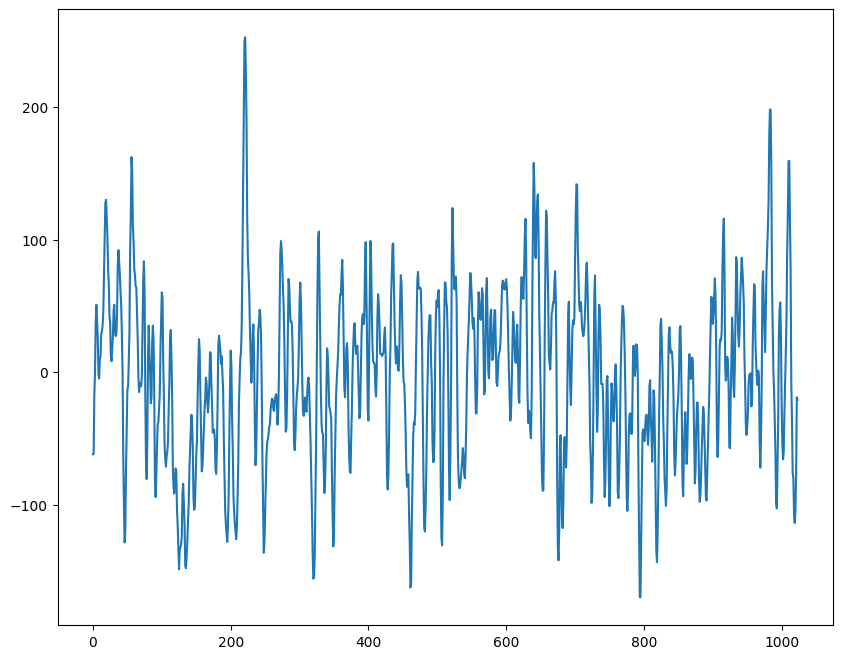

In [5]:
# Plota o primeiro evento para que seja escolhido o threshold
event_0 = df_wave.loc[ 8,'Waveform' ]
baseline = np.mean(event_0[400:])
event_0_corr = event_0 - baseline

fig = plt.figure( figsize=(10,8) )
X = 0.2 * np.arange( 1024 )
plt.plot( event_0_corr)

binX_0 = (event_0_corr > 350)
verify_data(binX_0)

In [6]:
#rise times do pulso
wave_threshold = 350

risetimes_wave = []
bin_wave = []
discarted_evt = []
valid_evt = []
max_vals = []
#descarta eventos que tenham zero ou mais de um pico acima do threshold
for i_evt in range(df_wave.shape[0]):
    event_wave = df_wave.loc[i_evt, 'Waveform']
    baseline_wave = np.mean(event_wave[600:])
    event_corr = event_wave  - baseline_wave
    binX_ = (event_corr>wave_threshold)        
    bin_wave.append(binX_.argmax())
    max_vals.append(event_corr[binX_.argmax()])
    if verify_data(binX_):
        risetimes_wave.append(0.2*binX_.argmax())
        valid_evt.append(i_evt)
    else:
        discarted_evt.append(i_evt)

risetimes_wave = np.array(risetimes_wave)
bin_wave = np.array(bin_wave)
valid_evt = np.array(valid_evt)
discarted_evt = np.array(discarted_evt)

print('rise ', risetimes_wave)
print('bin ', bin_wave)
print('discarted', discarted_evt)
print('valid', valid_evt)
print('max', max_vals)

print(len(risetimes_wave))
len(valid_evt)

rise  [40.2 37.4 39.4 ... 41.4 39.  41. ]
bin  [201   0 187 ...   0   0   0]
discarted [   1    7    8 ... 9997 9998 9999]
valid [   0    2    3 ... 9990 9992 9993]
max [430.06256, -65.4361, 372.14758, 355.69836, 414.09216, 357.8819, 373.27563, -66.71301, -59.608643, 361.62006, 358.22943, -90.28656, 381.48688, -7.729492, 350.0404, 395.28082, -72.48657, 357.84283, 25.179565, 407.79486, -149.73364, 353.85626, -61.89734, 361.03418, -2.135315, 372.4334, -67.52057, 356.75293, 355.92285, 411.2563, 363.61932, 375.11713, -160.75226, -9.331421, 117.04895, -24.019836, -27.089905, 354.20178, 2.385376, 389.43103, 155.47998, 22.863342, 29.296448, 382.36237, 357.46948, -71.7229, 21.524475, -56.28363, 433.55835, -41.334473, 372.35645, 397.961, 449.65704, 83.30084, 415.81256, 41.32782, 426.50983, 358.0937, 428.31696, 22.953125, 354.73535, 398.57123, 362.5138, 369.8747, 361.589, 350.32788, 385.1541, 384.90442, 356.3039, 370.51166, 351.50244, 394.99445, 368.64294, 405.14142, 353.5711, 27.496765, 374.019

6100

In [7]:
# Abre o arquivo H5 contendo informações do trigger
file_trigg = h5py.File( "C:/Users/vinif/Desktop/PIBIC/Programas/Atenuador/M1/output-TR_0_0_M1.h5", 'r' )

d_trigg = file_trigg[ 'Waveform' ]
d_trigg_meta = file_trigg[ 'Metadata' ]

# Mostra o número de enventos do pulso
print ( "Number of events (trigger): {:d}".format( d_trigg.shape[0] ) )

Number of events (trigger): 10000


In [8]:
# Data Frame do pandas para o trigger
df_trigg = pd.DataFrame( columns=('Event','Channel','Waveform') )
df_trigg['Event']   = d_trigg_meta[:,0]
df_trigg['Channel'] = d_trigg_meta[:,1]
for i in range( d_trigg.shape[0] ):
    df_trigg[ 'Waveform' ].iloc[ i ] = d_trigg[ i ]

df_trigg

,Event,Channel,Waveform
0,733079.0,-1.0,"[2194.0, 2194.0, 2194.9917, 2198.9502, 2197.03..."
1,733080.0,-1.0,"[2198.0, 2198.0, 2197.0012, 2198.0, 2197.9968,..."
2,733081.0,-1.0,"[2197.0, 2197.0015, 2199.0015, 2199.9985, 2198..."
3,733082.0,-1.0,"[2194.0, 2194.0, 2193.007, 2193.0, 2194.973, 2..."
4,733083.0,-1.0,"[2197.0, 2197.007, 2198.9868, 2197.0186, 2198...."
...,...,...,...
9995,755741.0,-1.0,"[2194.0, 2194.0, 2193.0132, 2193.98, 2194.0, 2..."
9996,755742.0,-1.0,"[2197.0, 2196.9954, 2196.0176, 2197.9497, 2194..."
9997,755743.0,-1.0,"[2198.0, 2197.997, 2195.0015, 2195.9941, 2194...."
9998,755744.0,-1.0,"[2197.0, 2196.9995, 2195.9983, 2195.0066, 2196..."


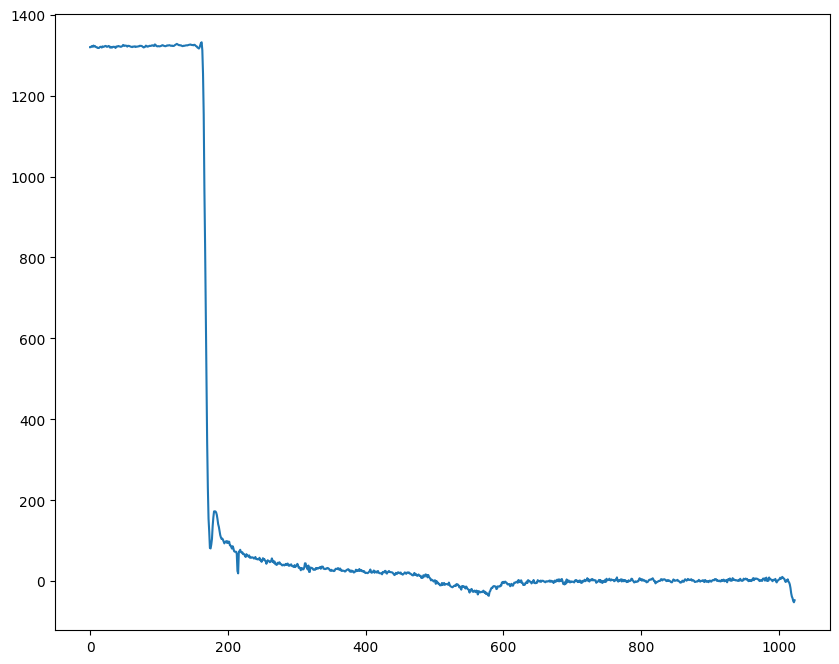

In [9]:
# Plota o primeiro evento para que se escolha o Threshold do trigger
i_evt = 21
if all(i_evt != x for x in discarted_evt):
    event_0 = df_trigg.loc[ i_evt,'Waveform' ]
    baseline = np.mean(event_0[600:])
    event_0_corr = event_0 - baseline

    fig = plt.figure( figsize=(10,8) )
    X = 0.2 * np.arange( 1024 )
    plt.plot( event_0_corr)

In [10]:
#rise times do pulso
trigg_threshold = 800

risetimes_trigg= []
bin_trigg = []
for i_evt in valid_evt: #seleciona dentre os eventos válidos
    event_trigg = df_trigg.loc[i_evt, 'Waveform']
    baseline_trigg = np.mean(event_trigg[600:])
    event_corr = event_trigg  - baseline_trigg
    binX_ = (event_corr<trigg_threshold).argmax()               # Threshold = 800
    bin_trigg.append(binX_)
    risetimes_trigg.append(0.2*binX_)

risetimes_trigg = np.array(risetimes_trigg)
bin_trigg = np.array(bin_trigg)

print('rise ', risetimes_trigg)
print('bin ', bin_trigg)
print(len(risetimes_trigg))
print(len(risetimes_wave))

rise  [30.6 27.6 29.8 ... 31.8 29.2 31.2]
bin  [153 138 149 ... 159 146 156]
6100
6100


In [11]:
# Risetimes corrigidos usando o trigger como referência
risetimes_corr = risetimes_wave - risetimes_trigg
risetimes_corr

array([9.6, 9.8, 9.6, ..., 9.6, 9.8, 9.8])

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.200e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.770e+02, 1.046e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.172e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.553e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.600e+01, 1.030e+0

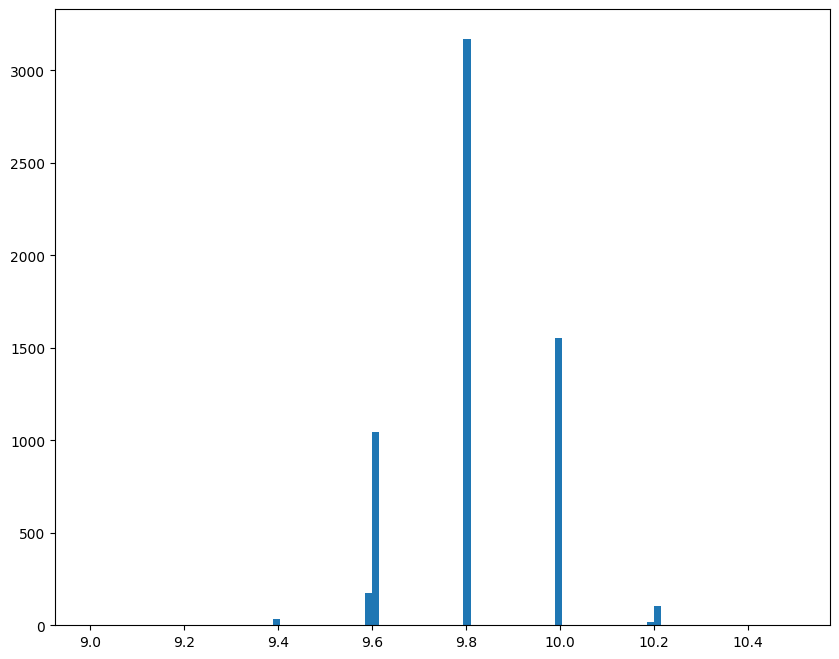

In [12]:
#Plota histograma dos risetimes
fig = plt.figure( figsize=(10,8) )
plt.hist( risetimes_corr, range=(9,10.5), bins=100 )

bin  10000


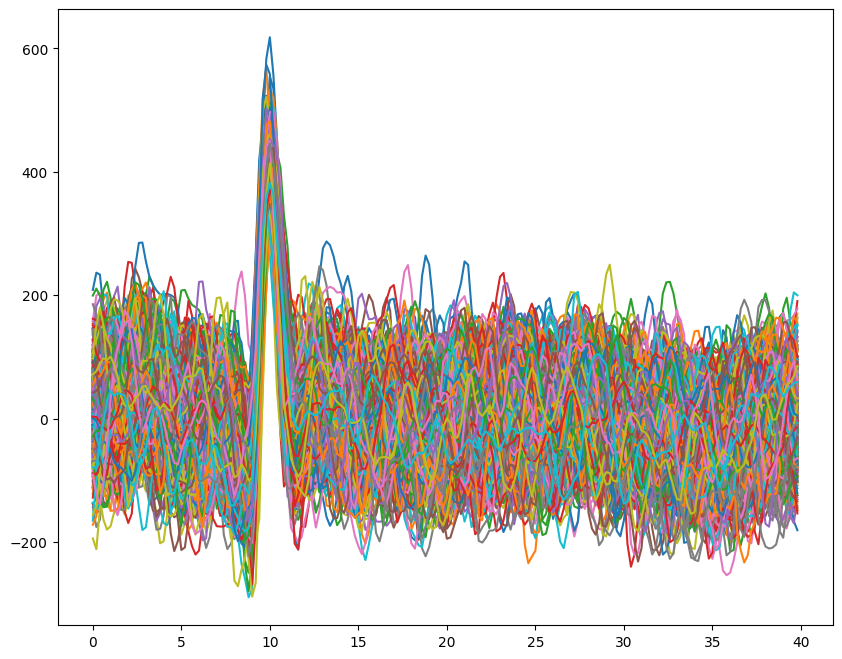

In [13]:

trigg_threshold = 800
bin_trigg_plot = []
for i_evt in range(df_trigg.shape[0]):
    event_trigg = df_trigg.loc[i_evt, 'Waveform']
    baseline_trigg = np.mean(event_trigg[600:])
    event_corr = event_trigg  - baseline_trigg
    binX_ = (event_corr<trigg_threshold).argmax()               # Threshold = 800
    bin_trigg_plot.append(binX_)

bin_trigg_plot = np.array(bin_trigg_plot)

print('bin ', len(bin_trigg_plot))

# Plota um numero 'num_evts' de eventos sobrepostos 
num_evts = 1000
tam = 200   #número de bins plotados por evento
fig = plt.figure( figsize=(10,8) )
X = 0.2 * np.arange( tam )

for i_evt in range(num_evts):
    if any(i_evt == x for x in valid_evt):
        event_0 = df_wave.loc[ i_evt,'Waveform' ]
        baseline = np.mean(event_0[300:])

        event_0_corr = event_0 - baseline

        event_plot = np.zeros(tam)
        for k in range(tam):
            event_plot[k] = event_0_corr[bin_trigg_plot[i_evt] + k]

        plt.plot(X, event_plot)



In [14]:
from scipy import interpolate
# Declara função q interpola os dados e retorna o risetime
def get_risetime( X, Y, threshold, sinal):
    x_vals = np.linspace(X[0], X[1023], 50*len(X))
    f = interpolate.interp1d(X, Y, 'cubic')
    y_vals = f(x_vals)
    if sinal == 'NEGATIVE':
        binX = ( y_vals < threshold ).argmax()
        risetime = x_vals[ binX ]
    elif sinal == 'POSITIVE':
        binX = ( y_vals > threshold ).argmax()
        risetime = x_vals[ binX ]
    return ( binX, risetime )

In [15]:
# toma os risetimes dos dados interpolados para o pulso
risetimes_wave = []
for i_evt in valid_evt:
    event_wave = df_wave.loc[i_evt, 'Waveform']
    baseline_wave = np.mean(event_wave[600:])
    event_corr = event_wave  - baseline_wave
    X = 0.2*np.arange(1024)
    binX_, risetime_ = get_risetime( X, event_corr, wave_threshold, 'POSITIVE' )
    # print( binX_, risetime_ )
    risetimes_wave.append( risetime_ )

risetimes_wave = np.array(risetimes_wave)
print(risetimes_wave)
len(risetimes_wave)

[40.04963378 37.32824079 39.39026543 ... 41.37636282 38.88275162
 40.93678392]


6100

In [16]:
# toma os risetimes dos dados interpolados para o trigger
risetimes_trigg= []
for i_evt in valid_evt:
    event_trigg = df_trigg.loc[i_evt, 'Waveform']
    baseline_trigg = np.mean(event_trigg[600:])
    event_corr = event_trigg  - baseline_trigg
    X = 0.2*np.arange(1024)
    binX_, risetime_ = get_risetime( X, event_corr, trigg_threshold, 'NEGATIVE')
    # print( binX_, risetime_ )
    risetimes_trigg.append( risetime_ )

risetimes_trigg = np.array(risetimes_trigg)
risetimes_trigg


array([30.40687123, 27.57758159, 29.66757944, ..., 31.71761558,
       29.12809625, 31.0622434 ])

media 9.817341542595447 
desvio padrão 0.15442015973644904


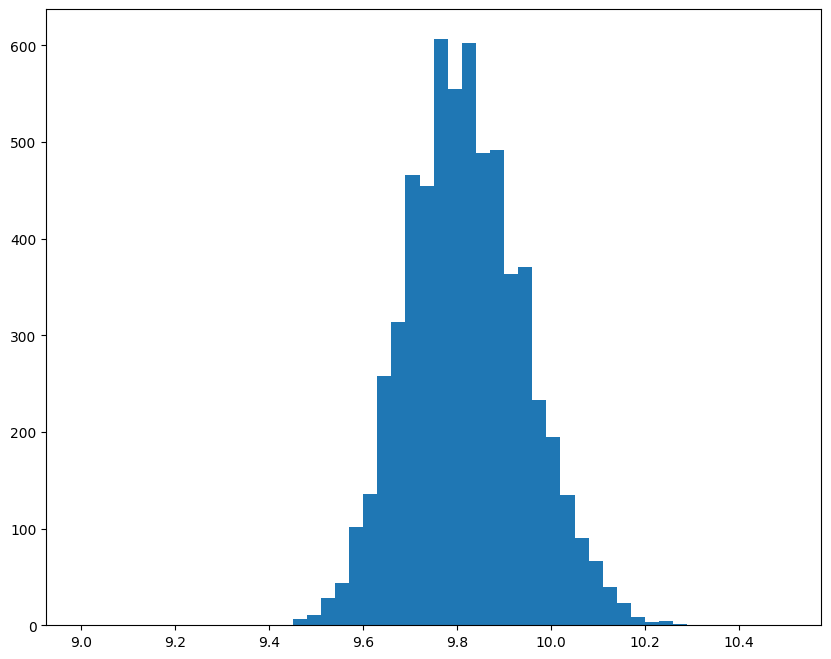

In [17]:
# histograma dos risetimes dos dados interpolados
risetimes_corr = ( risetimes_wave - risetimes_trigg )
fig = plt.figure( figsize=(10,8) )
plt.hist( risetimes_corr, range=(9,10.5), bins=50 )
print ( 'media', risetimes_corr.mean(), '\ndesvio padrão', risetimes_corr.std(ddof=1) )

In [18]:
#ajusta os pontos do histograma para realizar ajuste de curva gaussiano
range_ = (9.3,10.3)
bins_ = 20
counts_, bin_edges_ = np.histogram( risetimes_corr, range=range_, bins=bins_ )
print ( counts_, '\n{}'.format(bin_edges_)  )
bin_centers_ = ( bin_edges_[:-1] + bin_edges_[1:] ) / 2
print ( bin_centers_ )
error_counts_ = np.sqrt( counts_ )
#fig = plt.figure( figsize=(10,8) )
#plt.errorbar( bin_centers_, counts_, yerr=error_counts_, fmt='ko' ) 

[   0    0    0   11   48  133  294  577  758 1010  915  820  608  427
  262  138   65   25    7    1] 
[ 9.3   9.35  9.4   9.45  9.5   9.55  9.6   9.65  9.7   9.75  9.8   9.85
  9.9   9.95 10.   10.05 10.1  10.15 10.2  10.25 10.3 ]
[ 9.325  9.375  9.425  9.475  9.525  9.575  9.625  9.675  9.725  9.775
  9.825  9.875  9.925  9.975 10.025 10.075 10.125 10.175 10.225 10.275]


In [19]:
# Define os parâmetros
max_ = np.max( counts_ )
mean_ = risetimes_corr.mean()
sigma_ = risetimes_corr.std(ddof=1)
print ( max_, mean_, sigma_ )

from scipy.optimize import curve_fit

# Define a gaussiana
def Gaus(x, A, mean, sigma):
    return A * np.exp( -0.5*( (x - mean)/sigma )**2 )

# Em uma otimização numérica, os valores iniciais dos parâmetros (A, mean, sigma) devem estar na região esperada para o ajuste 
p0 = ( max_, mean_, sigma_ )

popt_gaus, pcov_gaus = curve_fit( Gaus, bin_centers_, counts_, absolute_sigma=False, bounds=( [0., -np.inf, 0. ], np.inf ), p0=p0 )

print ( popt_gaus ) # Valores otimizados dos parâmetros
print ( pcov_gaus ) # Matriz de covariância

1010 9.817341542595447 0.15442015973644904
[9.66747643e+02 9.81003463e+00 1.25872317e-01]
[[ 3.58033048e+02  1.79620117e-09 -3.10778807e-02]
 [ 1.79620117e-09  8.09273285e-06  4.84522767e-12]
 [-3.10778807e-02  4.84522767e-12  8.09279914e-06]]


A = 966.7476434936107 ± 18.921761228512903
mean = 9.81003462518703 ± 0.0028447728993913762
sigma = 0.1258723167995465 ± 0.0028447845502389464


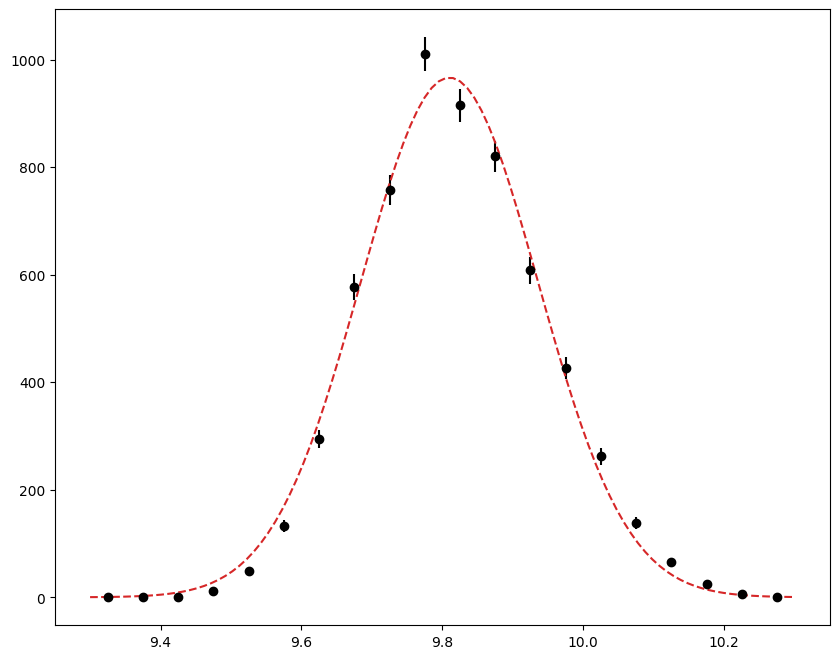

In [20]:
#print ( popt_gaus )
#print ( pcov_gaus )
print ( "A = {} ± {}".format( popt_gaus[ 0 ], np.sqrt( pcov_gaus[ 0, 0 ] ) ) )
print ( "mean = {} ± {}".format( popt_gaus[ 1 ], np.sqrt( pcov_gaus[ 1, 1 ] ) ) )
print ( "sigma = {} ± {}".format( popt_gaus[ 2 ], np.sqrt( pcov_gaus[ 2, 2 ] ) ) )


fig = plt.figure( figsize=(10,8) )
plt.errorbar( bin_centers_, counts_, yerr=error_counts_, fmt='ko' )
X_plot = np.linspace( range_[0], range_[1], 100 )
plt.plot( X_plot, Gaus( X_plot, A=popt_gaus[ 0 ], mean=popt_gaus[ 1 ], sigma=popt_gaus[ 2 ] ), linestyle='dashed', color='tab:red' )

[564.6893005371097, 502.3018676757817, 474.5972412109377, 636.2514038085939, 423.90509033203114, 439.0691345214845, 433.81459350586056, 254.5958435058589, 448.138378906251, 611.8398010253906, 410.91017456054675, 376.6243164062501, 434.198730468751, 347.1583374023437, 340.85219116210897, 418.480529785156, 263.5624816894535, 649.7306457519531, 377.53333740234484, 484.4443176269531, 535.6879150390621, 323.15640869140645, 555.2536376953127, 314.75997924804716, 375.279876708984, 522.3102355957031, 531.6278076171872, 365.01602172851625, 581.4973510742196, 384.8492370605471, 508.7530639648442, 399.94445190429747, 536.2147155761716, 364.4428222656253, 526.9308410644529, 696.8980102539074, 412.77156372070317, 249.94439697265545, 441.84000854492194, 505.1035095214843, 273.3961425781253, 475.48568725585926, 496.6033447265623, 502.47702636718753, 324.39223022460953, 502.4014465332039, 485.3548828124999, 429.93038330078093, 522.4347106933595, 509.1401306152344, 430.05421752929686, 394.1444458007814

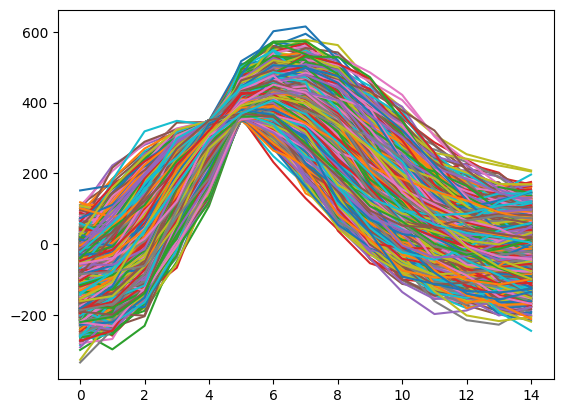

In [21]:
# Calcula a carga média - integral do pulso
charges = []

for i_evt in valid_evt: 
    interval = np.arange(bin_wave[i_evt]-5, bin_wave[i_evt]+10, 1)
    X = 0.2 * interval
    event_wave = df_wave.loc[i_evt, 'Waveform']
    baseline_wave = np.mean(event_wave[600:])
    event_corr = event_wave  - baseline_wave

    pulse = []
    for k in interval:
        pulse_ = event_corr[k]
        pulse.append(pulse_)
    plt.plot(pulse)

    charge = np.trapz(pulse, X)
    charges.append(charge)

print(charges)
charge_mean = np.mean(charges) /50
print('Mean pulse charge: ', charge_mean)